<a href="https://colab.research.google.com/github/uyminhtri2702/AI/blob/main/Cifa100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#  Gọi các thư viên cần thiết
import numpy as np
import pandas as pd
from keras.datasets import cifar10 , cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [22]:
# Chia dữ liệu thành 2 phần:  phần huyến luyện và phần test
(x_train, y_train),(x_test,y_test) = cifar100.load_data()


<function matplotlib.pyplot.show>

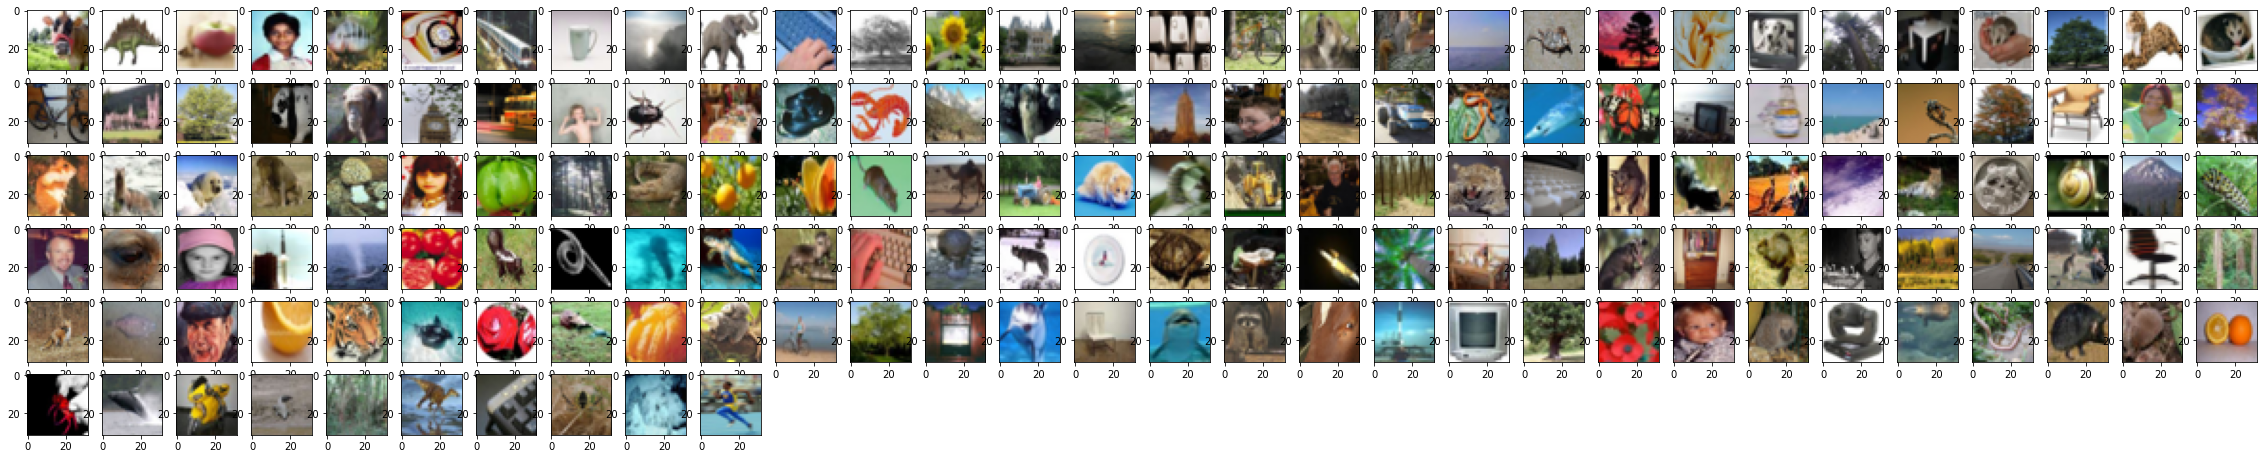

In [23]:
plt.figure(figsize=(40,40))
for i in range(160):
  plt.subplot(30,30,i+1)
  plt.imshow(x_train[i])
plt.show

In [25]:
# Kích thước các tập dữ liệu
x_train.shape , x_test .shape,  y_train.shape,  y_test.shape

((50000, 3072), (10000, 3072), (50000, 100), (10000, 100))

In [24]:
#  x_train , x_test  là mảng 4 chiều nên chuyển sang mảng 2 chiều 
x_train = x_train.reshape(50000 , 3072 )  #32*32*3
x_test = x_test.reshape(10000 ,  3072 )   #32*32*3

# Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /= 255

# Chuyển y thành 100 class do output là 100
y_train =np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
# Tạo mạng neron nhân tạo

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

In [ ]:
# Huấn luyện mô hình 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=300 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])
# verbose=1  hiển thị  thanh tiến trình

Epoch 1/300
313/313 [==============================] - 4s 11ms/step - loss: 3.4762 - accuracy: 0.1768 - val_loss: 3.4610 - val_accuracy: 0.1877
Epoch 2/300
313/313 [==============================] - 3s 10ms/step - loss: 3.4769 - accuracy: 0.1744 - val_loss: 3.5094 - val_accuracy: 0.1860
Epoch 3/300
313/313 [==============================] - 3s 9ms/step - loss: 3.4696 - accuracy: 0.1758 - val_loss: 3.5281 - val_accuracy: 0.1770
Epoch 4/300
313/313 [==============================] - 3s 9ms/step - loss: 3.4671 - accuracy: 0.1769 - val_loss: 3.4610 - val_accuracy: 0.1871
Epoch 5/300
313/313 [==============================] - 3s 10ms/step - loss: 3.4662 - accuracy: 0.1767 - val_loss: 3.4988 - val_accuracy: 0.1809
Epoch 6/300
313/313 [==============================] - 3s 9ms/step - loss: 3.4590 - accuracy: 0.1767 - val_loss: 3.4577 - val_accuracy: 0.1861
Epoch 7/300
266/313 [========================>.....] - ETA: 0s - loss: 3.4555 - accuracy: 0.1810